In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

import warnings
warnings.filterwarnings("ignore")

In [39]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize']=(14,7)
plt.rcParams['figure.facecolor'] = '#FFF'

In [40]:
data = pd.read_csv("heart_disease.csv")

In [41]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - have disease or not (1=yes, 0=no)

<AxesSubplot:>

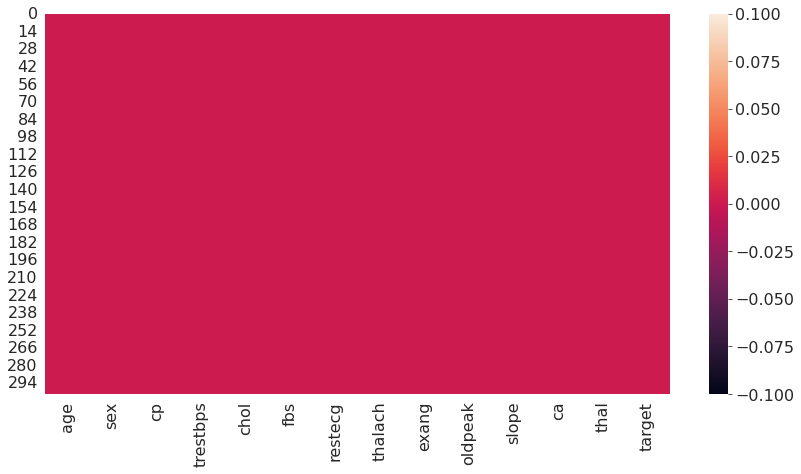

In [42]:
sns.heatmap(data.isnull())

In [43]:
df = pd.DataFrame(data)

Text(0, 0.5, 'Count')

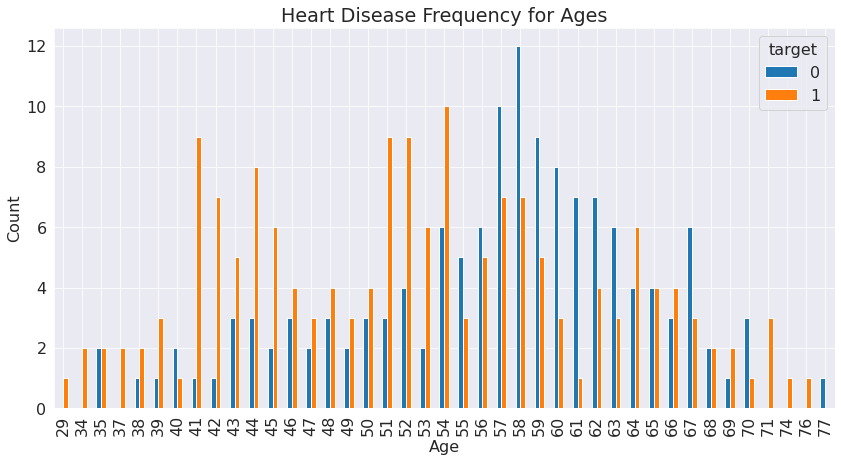

In [44]:
pd.crosstab(df['age'],df['target']).plot(kind="bar")
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Count')

In [45]:
fig = ex.histogram(df,x="trestbps",color="target",marginal='box',color_discrete_sequence=['aqua',"lime"],title="Resting Blood Pressure")
fig.update_layout(bargap=0.2)

<AxesSubplot:xlabel='thal', ylabel='count'>

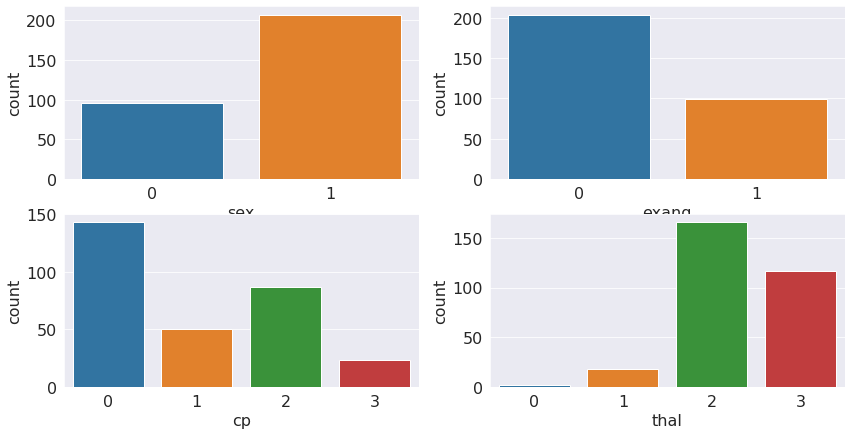

In [46]:
plt.subplot(2,2,1)
sns.countplot(data=df,x="sex")
plt.subplot(2,2,2)
sns.countplot(data=df,x="exang")
plt.subplot(2,2,3)
sns.countplot(data=df,x="cp")
plt.subplot(2,2,4)
sns.countplot(data=df,x="thal")

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

<AxesSubplot:xlabel='fbs', ylabel='count'>

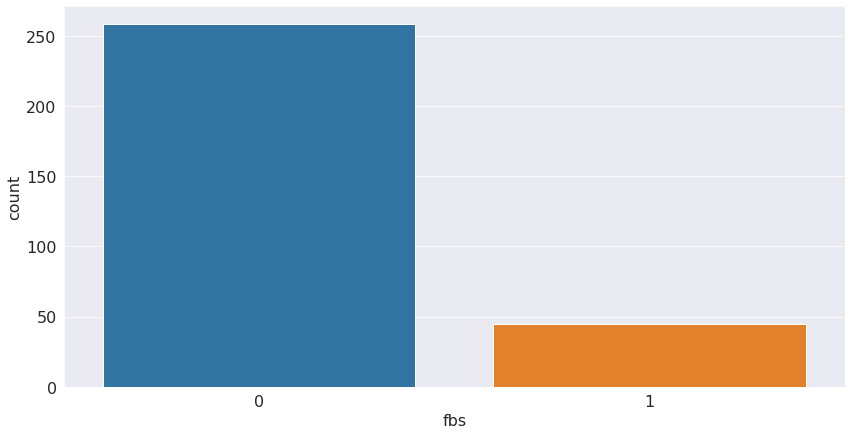

In [47]:
sns.countplot(data=df,x="fbs")

<AxesSubplot:>

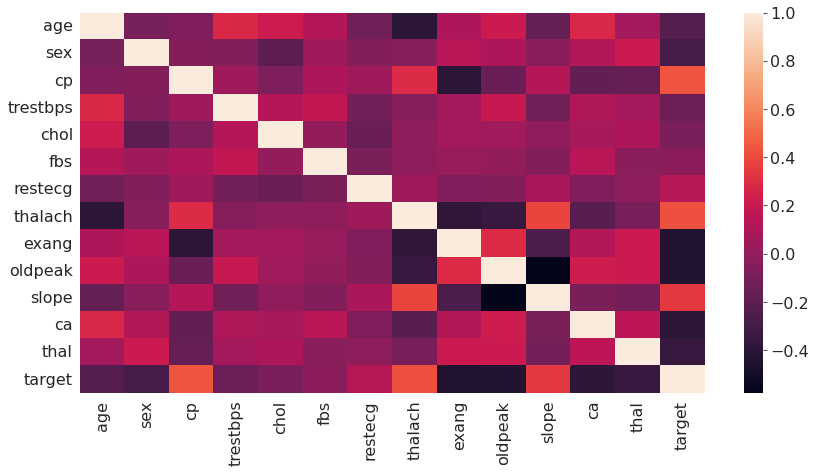

In [48]:
sns.heatmap(df.corr())

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No empty values and no object data type, a perfect a dataset

In [50]:
features = ['cp','thalach','age','slope','exang','oldpeak']
X = data[features]
Y = data['target']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [54]:
model.score(x_train,y_train)

0.7933884297520661

In [55]:
model.score(x_test,y_test)

0.7868852459016393

In [ ]:
# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [56]:
score = accuracy_score(predict,y_test)

In [57]:
score

0.7868852459016393

In [58]:
f1 = f1_score(predict,y_test)

In [59]:
f1

0.8219178082191781

In [60]:
precision = precision_score(predict,y_test)

In [61]:
precision

0.8823529411764706

In [62]:
recall = recall_score(predict,y_test)

In [63]:
recall

0.7692307692307693

In [64]:
confusion_matrix(predict,y_test)

array([[18,  4],
       [ 9, 30]])

<AxesSubplot:>

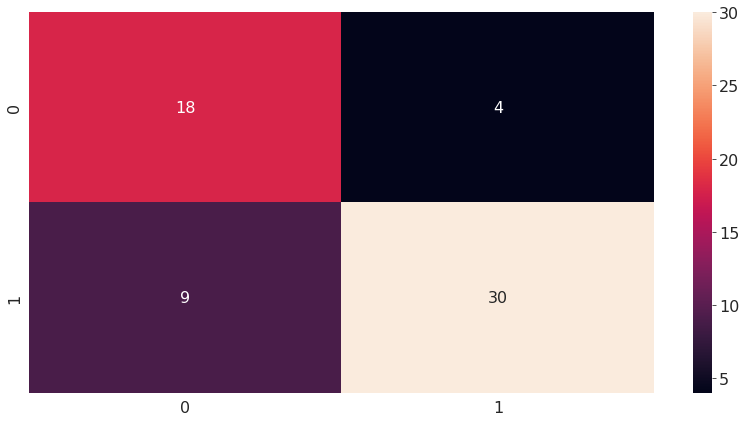

In [66]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)